In [1]:
import numpy as np
import matplotlib.pyplot as plt
from wave_generator import generating_signal_batchs, nonst_narrow_wave_generator
from utils import visualize_signal
import mne

In [34]:
sfreq = 200
n_channels = 1
n_samples = 1000

In [35]:
delta_waves = generating_signal_batchs(nonst_narrow_wave_generator, n_samples, n_channels, sfreq, 30, 'delta', white_noise=0.2)
theta_waves = generating_signal_batchs(nonst_narrow_wave_generator, n_samples, n_channels, sfreq, 30, 'theta', white_noise=0.2)
alpha_waves = generating_signal_batchs(nonst_narrow_wave_generator, n_samples, n_channels, sfreq, 30, 'alpha', white_noise=0.2)
beta_waves = generating_signal_batchs(nonst_narrow_wave_generator, n_samples, n_channels, sfreq, 30, 'beta',   white_noise=0.2)
gamma_waves = generating_signal_batchs(nonst_narrow_wave_generator, n_samples, n_channels, sfreq, 30, 'gamma', white_noise=0.2)

In [51]:
# removing channel dimension because we use 1 channel
delta_waves = np.reshape(delta_waves, (n_samples, sfreq*30))
theta_waves = np.reshape(theta_waves, (n_samples, sfreq*30))
alpha_waves = np.reshape(alpha_waves, (n_samples, sfreq*30))
beta_waves = np.reshape(beta_waves, (n_samples, sfreq*30))
gamma_waves = np.reshape(gamma_waves, (n_samples, sfreq*30))

In [52]:
X = np.concatenate((delta_waves, theta_waves, alpha_waves, beta_waves, gamma_waves), axis=0)

In [53]:
delta_labels = 0* np.ones((delta_waves.shape[0], 1))
theta_labels = 1* np.ones((theta_waves.shape[0], 1)) 
alpha_labels = 2* np.ones((alpha_waves.shape[0], 1))
beta_labels = 3* np.ones((beta_waves.shape[0], 1))
gamma_labels = 4* np.ones((gamma_waves.shape[0], 1))


In [54]:
y = np.concatenate((delta_labels, theta_labels, alpha_labels, beta_labels, gamma_labels), axis=0)

In [55]:
X.shape

(5000, 6000)

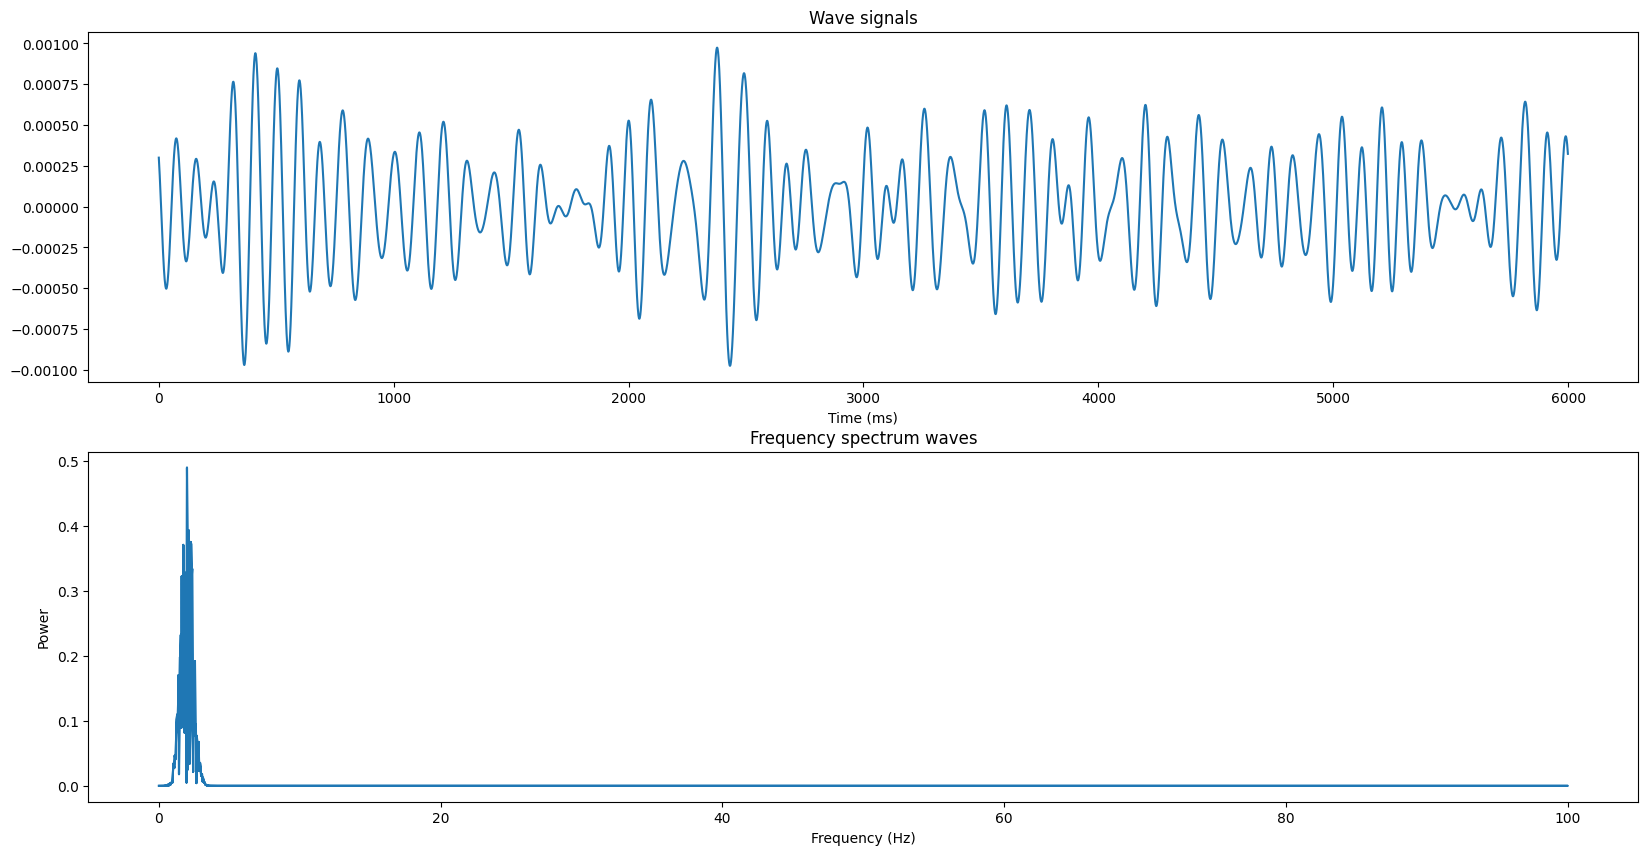

In [56]:
visualize_signal(X[0])

In [57]:
X_filter = np.zeros((X.shape[0], 16, X.shape[1]))

# Filter with FIR filter, each band width 5hz width
for i in range(X.shape[0]): # samples
    for band in range(0, 16): # frequency bands
        X_filter[i, band, :] = mne.filter.filter_data(X[i], sfreq, l_freq=(5*band), h_freq=(5*band)+5, verbose=False, copy=True)

: 

In [ ]:
X_filter.shape

(1000, 16, 6000)